# Project - Data Cleaning

## Introduction
In this lab, we'll make use of everything we've learned about pandas, data cleaning, and exploratory data analysis. In order to complete this lab, you'll have to import, clean, combine, reshape, and visualize data to answer questions provided, as well as your own questions!

## Objectives
You will be able to:
- Use different types of joins to merge DataFrames 
- Identify missing values in a dataframe using built-in methods 
- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset 
- Inspect data for duplicates or extraneous values and remove them 


## The dataset
In this lab, we'll work with the comprehensive [Super Heroes Dataset](https://www.kaggle.com/claudiodavi/superhero-set/data), which can be found on Kaggle!


## Getting Started

In the cell below:

* Import and alias pandas as `pd`
* Import and alias numpy as `np`
* Import and alias seaborn as `sns`
* Import and alias matplotlib.pyplot as `plt`
* Set matplotlib visualizations to display inline in the notebook

In [366]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

For this lab, our dataset is split among two different sources -- `'heroes_information.csv'` and `'super_hero_powers.csv'`.

Use pandas to read in each file and store them in DataFrames in the appropriate variables below. Then, display the `.head()` of each to ensure that everything loaded correctly.  

In [367]:
heroes_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

It looks as if the heroes information dataset contained an index column.  We did not specify that this dataset contained an index column, because we hadn't seen it yet. Pandas does not know how to tell apart an index column from any other data, so it stored it with the column name `Unnamed: 0`.  

Our DataFrame provided row indices by default, so this column is not needed.  Drop it from the DataFrame in place in the cell below, and then display the head of `heroes_df` to ensure that it worked properly. 

In [368]:
heroes_df = heroes_df.drop('Unnamed: 0', axis=1)
heroes_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


## Familiarize yourself with the dataset

The first step in our Exploratory Data Analysis will be to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In the cell below, get the descriptive statistics of each DataFrame.  

In [369]:
print(powers_df.info())
powers_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB
None


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

## Dealing with missing values

Starting in the cell below, detect and deal with any missing values in either DataFrame. Then, explain your methodology for detecting and dealing with outliers in the markdown section below. Be sure to explain your strategy for dealing with missing values in numeric columns, as well as your strategy for dealing with missing values in non-numeric columns.  

Note that if you need to add more cells to write code in, you can do this by:

**1.** Highlighting a cell and then pressing `ESC` to enter command mode.  
**2.** Press `A` to add a cell above the highlighted cell, or `B` to add a cell below the highlighted cell. 

Describe your strategy below this line:
____________________________________________________________________________________________________________________________
## Heroes_df Data Strategies

Duplicate Data - I will drop the duplicate data presented as 

Publisher Data (15 NaN) - Missing data will be asigned as "Unknown".  Catagorical data can be more challenging to replace though I feel that there may be value in assigning a new catagory here.  Perhaps we can use other features to predict which publisher a particular hero may belong to?

Gender Data (29 counts of '-') - Small number of missing data, drop rows.

Race (304 counts of '-') - Not enough data, missing nearly 50%, drop column.

Skin color (662 counts of '-') - Not enough data, missing over 80%, drop column.

Alignment (7 counts of '-') -  Small number of missing data, drop rows.

**The following 4 feature data will be addressed by seperateing the heroes_df into two dataframes and interpolating based on relative proportions per gender.**

**Weight Data (237 counts of -99) + Height Data (217 counts of -99) + Eye Color Data (172 counts of '-') + Hair color (172 counts of '-')**

## Powers_df Strategies

The data for this dataframe is composed of boolean values except for the first feature 'name'.  I will join this in later on using the name as the index.

In [370]:
heroes_df.drop_duplicates(subset='name', inplace=True)

In [371]:
heroes_df.drop(['Race', 'Skin color'], axis=1, inplace=True)
heroes_df

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,-99.0,Marvel Comics,bad,-99.0
...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Strawberry Blond,165.0,Marvel Comics,good,52.0
730,Ymir,Male,white,No Hair,304.8,Marvel Comics,good,-99.0
731,Yoda,Male,brown,White,66.0,George Lucas,good,17.0
732,Zatanna,Female,blue,Black,170.0,DC Comics,good,57.0


In [372]:
heroes_df = heroes_df[heroes_df['Gender'] != '-']
heroes_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [373]:
heroes_df = heroes_df[heroes_df['Alignment'] != '-']
heroes_df['Alignment'].unique()

array(['good', 'bad', 'neutral'], dtype=object)

In [374]:
powers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [375]:
heroes_df.isna().sum()

name           0
Gender         0
Eye color      0
Hair color     0
Height         0
Publisher     12
Alignment      0
Weight         1
dtype: int64

## First we will address the missing Publisher data

In [376]:
heroes_df['Publisher'].isna().sum()

12

In [377]:
print(heroes_df['Publisher'].unique(), '\n')
print(heroes_df['Publisher'].describe(), '\n')
print(heroes_df['Publisher'].value_counts(), '\n')

['Marvel Comics' 'Dark Horse Comics' 'DC Comics' 'NBC - Heroes'
 'Wildstorm' 'Image Comics' nan 'Icon Comics' 'SyFy' 'Hanna-Barbera'
 'George Lucas' 'Team Epic TV' 'South Park' 'HarperCollins' 'ABC Studios'
 'Universal Studios' 'Star Trek' 'IDW Publishing' 'Shueisha'
 'Sony Pictures' 'J. K. Rowling' 'Titan Books' 'Rebellion' 'Microsoft'
 'J. R. R. Tolkien'] 

count               669
unique               24
top       Marvel Comics
freq                352
Name: Publisher, dtype: object 

Marvel Comics        352
DC Comics            204
NBC - Heroes          19
Dark Horse Comics     17
George Lucas          14
Image Comics          13
HarperCollins          6
Star Trek              5
Team Epic TV           5
SyFy                   5
ABC Studios            4
Shueisha               4
Icon Comics            4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
J. K. Rowling          1
Rebellion              1
Universal Studios      1
Hanna-Barbera          1
South Par

Only 1% of the records are missing from the 'Publisher' feature. 

Therefore I will replace them as 'Unknown'. 

I feel that this missing feature data cannot be assumed and is therefore relevant and worth keeping.



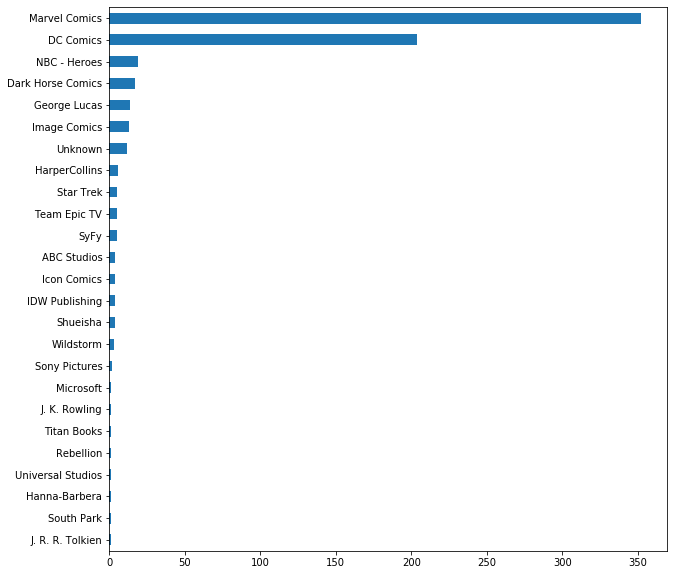

In [378]:
print('Only {}% of the records are missing from the \'Publisher\' feature. \n\nTherefore I will replace them as \'Unknown\'. \n\nI feel that this missing feature data cannot be assumed and is therefore relevant and worth keeping.\n'
      .format(int((heroes_df['Publisher'].isna().sum()/len(heroes_df['Publisher']))*100)))
heroes_df['Publisher'].fillna('Unknown', inplace=True)
heroes_df['Publisher'].value_counts().sort_values().plot.barh(figsize=(10,10));

## Next we will address the missing Weight data by Gender, starting with Males.

In [379]:
male_heroes = heroes_df[heroes_df['Gender'] == 'Male']
male_heroes

,name,Gender,Eye color,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Black,-99.0,Marvel Comics,bad,-99.0
5,Absorbing Man,Male,blue,No Hair,193.0,Marvel Comics,bad,122.0
6,Adam Monroe,Male,blue,Blond,-99.0,NBC - Heroes,good,-99.0
7,Adam Strange,Male,blue,Blond,185.0,DC Comics,good,88.0
9,Agent Bob,Male,brown,Brown,178.0,Marvel Comics,good,81.0
10,Agent Zero,Male,-,-,191.0,Marvel Comics,good,104.0


In [380]:
print(len(male_heroes['Weight'].value_counts()), '\n')
print(male_heroes['Weight'].describe(), '\n')

112 

count    484.000000
mean      53.727273
std      139.530787
min      -99.000000
25%      -99.000000
50%       79.000000
75%      101.000000
max      900.000000
Name: Weight, dtype: float64 



139.5307872109598

In [381]:
male_heroes[(male_heroes['Weight'] > 0)
            &
            (male_heroes['Weight']<= male_heroes['Weight'].quantile(.90))]['Weight'].describe()


count    281.000000
mean      90.174377
std       30.569035
min        2.000000
25%       77.000000
50%       86.000000
75%      101.000000
max      180.000000
Name: Weight, dtype: float64

**This seems like a more reasonable distribution, let's get rid of the rows with heroes weight > 90th percentile before we proceed. We will do the same for the height as well and repeat for the female heroes.**

485
434


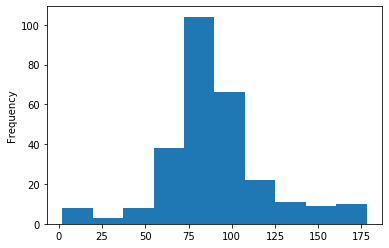

In [382]:
print(len(male_heroes))
male_heroes = male_heroes[male_heroes['Weight'] < male_heroes['Weight'].quantile(.9)]
print(len(male_heroes))
male_heroes[male_heroes['Weight'] > 0]['Weight'].plot.hist();

**Soas you can see above we lost about 50 rows, acceptable considering the circumstances I think.**

In [383]:
print(male_heroes['Weight'].describe())

count    434.000000
mean      22.198157
std       93.520779
min      -99.000000
25%      -99.000000
50%       74.000000
75%       90.000000
max      178.000000
Name: Weight, dtype: float64


**Let's see how this column changes after we interpolate the weights!**

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


count    434.000000
mean      88.294931
std       30.020634
min        2.000000
25%       77.000000
50%       86.000000
75%       99.000000
max      178.000000
Name: Weight, dtype: float64
1


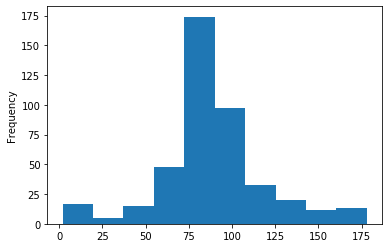

In [393]:
real_male_weights_list = male_heroes[male_heroes['Weight'] > 0]['Weight']

rel_male_weights_prob = real_male_weights_list.value_counts(normalize=True)

def male_weight_list_fixer(weight):
        if weight < 0:
            return np.random.choice(rel_male_weights_prob.keys(), p=rel_male_weights_prob)
        else:
            return weight

male_heroes['Weight'] = male_heroes['Weight'].map(lambda x: male_weight_list_fixer(x))
print(male_heroes['Weight'].describe())
print(male_heroes['Weight'].isna().sum())
male_heroes['Weight'].plot.hist();

In [394]:
# There still seemed to be 1 record with a NaN value, lets just drop it here.
heroes_df = heroes_df.dropna(subset=['Weight'])
print(heroes_df['Weight'].isna().sum())

0


**This looks much better! Lets do the same analysis for the height next!  This time however, we shouldnt need to drop as many outliers as it is likely that the heroes with the outlying weight had a similarly large height, lets see!**

## Next we will address the missing Height data by Gender, starting with Males.

In [396]:
print(len(male_heroes['Height'].value_counts()), '\n')
print(male_heroes['Height'].describe(), '\n')

43 

count    434.000000
mean      97.095622
std      146.881457
min      -99.000000
25%      -99.000000
50%      178.000000
75%      188.000000
max      975.000000
Name: Height, dtype: float64 



In [401]:
male_heroes[(male_heroes['Height'] > 0)
            &
            (male_heroes['Height']<= male_heroes['Height'].quantile(.99))]['Height'].describe()


count    291.000000
mean     180.981787
std       24.137308
min       15.200000
25%      178.000000
50%      183.000000
75%      188.000000
max      259.000000
Name: Height, dtype: float64

**I think that going with the 99th percentile here is okay considering the max is not too unreasonable, we are talking about super heroes after all!**

435
429


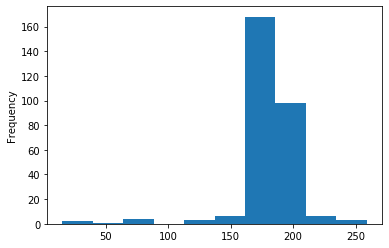

In [402]:
print(len(male_heroes))
male_heroes = male_heroes[male_heroes['Height'] < male_heroes['Height'].quantile(.99)]
print(len(male_heroes))
male_heroes[male_heroes['Height'] > 0]['Height'].plot.hist();

**Ok, much better here, we only lost 6 rows while keeping the maximum height within superhero reason!**

In [403]:
print(male_heroes['Height'].describe())

count    429.000000
mean      90.917716
std      132.436724
min      -99.000000
25%      -99.000000
50%      178.000000
75%      185.000000
max      259.000000
Name: Height, dtype: float64


**Let's see how this column changes after we interpolate the heights!**

C:\Users\tcast\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


count    429.000000
mean     181.366434
std       22.585897
min       15.200000
25%      178.000000
50%      183.000000
75%      188.000000
max      259.000000
Name: Height, dtype: float64
0


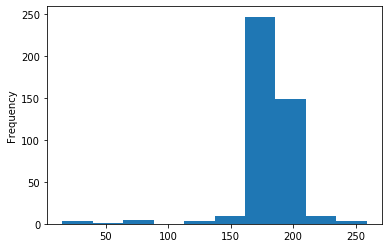

In [404]:
real_male_heights_list = male_heroes[male_heroes['Height'] > 0]['Height']

rel_male_heights_prob = real_male_heights_list.value_counts(normalize=True)

def male_height_list_fixer(height):
        if height < 0:
            return np.random.choice(rel_male_heights_prob.keys(), p=rel_male_heights_prob)
        else:
            return height

male_heroes['Height'] = male_heroes['Height'].map(lambda x: male_height_list_fixer(x))
print(male_heroes['Height'].describe())
print(male_heroes['Height'].isna().sum())
male_heroes['Height'].plot.hist();

**This seems to match out distribution from above so it looks like it worked.  I know there are other interpolation techniques out there but for now I wanted to practice this one and see what happens! I can see the downside to simply copying values in rather than rying to interpolate them on a continuous scale >.<**

## Joining, Grouping, and Aggregating

In the cell below, join the two DataFrames.  Think about which sort of join you should use, as well as which columns you should join on.  Rename columns and manipulate as needed.  

**_HINT:_** Consider the possibility that the columns you choose to join on contain duplicate entries. If that is the case, devise a strategy to deal with the duplicates.

**_HINT:_** If the join throws an error message, consider setting the column you want to join on as the index for each DataFrame.  

In the cell below, subset male and female heroes into different dataframes.  Create a scatterplot of the height and weight of each hero, with weight as the y-axis.  Plot both the male and female heroes subset into each dataframe, and make the color for each point in the scatterplot correspond to the gender of the superhero.

## Some Initial Investigation

Next, slice the DataFrame as needed and visualize the distribution of heights and weights by gender.  You should have 4 total plots.  

In the cell below:

* Slice the DataFrame into separate DataFrames by gender
* Complete the `show_distplot()` function.  This helper function should take in a DataFrame, a string containing the gender we want to visualize, and the column name we want to visualize by gender. The function should display a distplot visualization from seaborn of the column/gender combination.  

Hint: Don't forget to check the [seaborn documentation for distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) if you have questions about how to use it correctly! 

In [ ]:
male_heroes_df = None
female_heroes_df = None

def show_distplot(dataframe, gender, column_name):
    pass

In [ ]:
# Male Height


In [ ]:
# Male Weight


In [ ]:
# Female Height


In [ ]:
# Female Weight


Discuss your findings from the plots above, with respect to the distribution of height and weight by gender.  Your explanation should include a discussion of any relevant summary statistics, including mean, median, mode, and the overall shape of each distribution.  

Write your answer below this line:
____________________________________________________________________________________________________________________________



### Sample Question: Most Common Powers

The rest of this notebook will be left to you to investigate the dataset by formulating your own questions, and then seeking answers using pandas and numpy.  Every answer should include some sort of visualization, when appropriate. Before moving on to formulating your own questions, use the dataset to answer the following questions about superhero powers:

* What are the 5 most common powers overall?
* What are the 5 most common powers in the Marvel Universe?
* What are the 5 most common powers in the DC Universe?

Analyze the results you found above to answer the following question:

How do the top 5 powers in the Marvel and DC universes compare?  Are they similar, or are there significant differences? How do they compare to the overall trends in the entire Superheroes dataset?

Write your answer below this line:
____________________________________________________________________________________________________________________________


### Your Own Investigation

For the remainder of this lab, you'll be focusing on coming up with and answering your own question, just like we did above.  Your question should not be overly simple, and should require both descriptive statistics and data visualization to answer.  In case you're unsure of what questions to ask, some sample questions have been provided below.

Pick one of the following questions to investigate and answer, or come up with one of your own!

* Which powers have the highest chance of co-occurring in a hero (e.g. super strength and flight), and does this differ by gender?
* Is there a relationship between a hero's height and weight and their powerset?
* What is the distribution of skin colors amongst alien heroes?

Explain your question below this line:
____________________________________________________________________________________________________________________________



Some sample cells have been provided to give you room to work. If you need to create more cells, you can do this easily by:

1. Highlighting a cell and then pressing `esc` to enter command mode.
1. Pressing `b` to add a cell below the currently highlighted cell, or `a` to add one above it.  

Be sure to include thoughtful, well-labeled visualizations to back up your analysis!

## Summary

In this lab, we demonstrated our mastery of:
* Using all of our Pandas knowledge to date to clean the dataset and deal with null values
* Using Queries and aggregations to group the data into interesting subsets as needed
* Using descriptive statistics and data visualization to find answers to questions we may have about the data